# Задание 3

In [29]:
%matplotlib inline

import random
import math
from itertools import islice
from typing import Generator, Tuple, List

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


sns.set(style='whitegrid')

In [11]:
def uniform_generator_2d(a: float, b: float) -> Generator[Tuple[float, float], None, None]:
    while True:
        yield (
            a * (2 * random.random() - 1),
            b * (2 * random.random() - 1)
        )

In [12]:
def uniform_generator_3d(a: float, b: float, c: float) -> Generator[Tuple[float, float, float], None, None]:
    while True:
        yield (
            a * (2 * random.random() - 1),
            b * (2 * random.random() - 1),
            c * (2 * random.random() - 1)
        )


In [13]:
def inside_ellipse(a: float, b: float, point: Tuple[float, float]):
    return (point[0] ** 2 / a ** 2) + (point[1] ** 2 / b ** 2) < 1

In [14]:
def inside_ellipsoid( a: float, b: float, c: float, point: Tuple[float, float, float]):
    return (point[0] ** 2 / a ** 2) + (point[1] ** 2 / b ** 2 + (point[2] ** 2 / c ** 2)) < 1

## Упражнение 1.
Составить программу моделирования случайных точек, равномерно распределенных  внутри эллипса $\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1$.

Построить гистограмму распределения.

In [15]:
def ellipse_generator(a: float, b: float)-> Generator[Tuple[float, float], None, None]:
    gen = uniform_generator_2d(a, b)
    while True:
        point = next(gen)
        if inside_ellipse(a, b, point):
            yield point

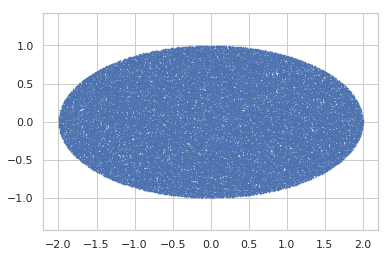

In [17]:
n_points = 10 ** 5

points = list(islice(ellipse_generator(2, 1), n_points))

plt.scatter(x=[p[0] for p in points], y=[p[1] for p in points], s=0.1)

plt.axis('equal')
plt.show()

## Упражнение 2.
Составить программы для вычисления площади эллипса и объема трехосного эллипсоида $\frac{x^2}{a^2} + \frac{y^2}{b^2} + \frac{z^2}{c^2} = 1$.

Привести результаты вычислений при нескольких значениях $N$.

Сравнить результаты с точным значением при нескольких значениях $N$.

### Площадь эллипса

In [19]:
a = 3
b = 4

gen = uniform_generator_2d(a, b)

exact_area = math.pi * a * b
underlying_area = 4 * a * b

for n in (10 ** 3, 10 ** 4, 10 ** 6):
    points = islice(gen, n)
    points_inside = 0
    for p in points:
        if inside_ellipse(a, b, p):
            points_inside += 1
    area = underlying_area * points_inside / n
    print(f'area_diff={math.fabs(exact_area-area)/exact_area}')

area_diff=0.0043266760171027045
area_diff=0.004331352887096391


area_diff=0.001181774341606982


### Объём эллипсоида

In [21]:
a = 3
b = 4
c = 5

gen = uniform_generator_3d(a, b, c)

exact_volume = 4 * math.pi * a * b * c / 3
underlying_volume = 8 * a * b * c

for n in (10 ** 3, 10 ** 4, 10 ** 6):
    points = islice(gen, n)
    points_inside = 0
    for p in points:
        if inside_ellipsoid(a, b, c, p):
            points_inside += 1
    volume = underlying_volume * points_inside / n
    print(f'rel_area_diff={math.fabs(exact_volume-volume)/exact_volume}')

rel_area_diff=0.01642245169208672
rel_area_diff=0.002289492745526329


rel_area_diff=0.0010805517978003732


## Упражнение 3.

Составить программу для моделирования случайных чисел с плотностью.

Построить гистограммы распределений, сравнить их с аналитической формулой.

In [36]:
n_points = 10 ** 4

### $w(x) = \frac{c}{x^{c+1}}, (1 < x < \infty)$